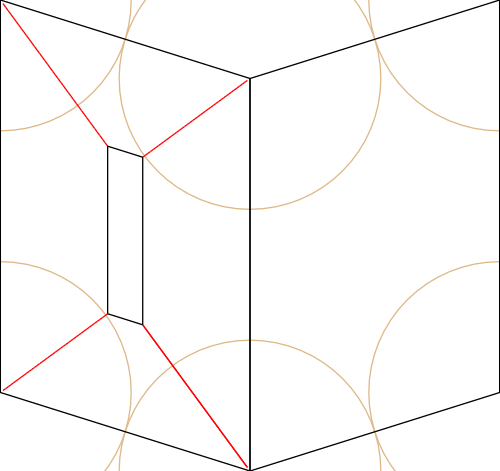

In [49]:
#from sympy import *
#from sympy.plotting import plot
import networkx as nx
import drawSvg as draw
import time
from shapely.geometry import Polygon, Point, MultiPoint, LineString
from shapely.geometry.polygon import orient

circle_color = "#DEB887"
crease_color = "red"
polygon_color = "black"
precision = 1
scale = 1
line_thickness = 10
viewport = 500
step = 20
def max_val (points):
    x = 0
    y = 0
    for point in points: 
        if point.x > x: x = point.x
        if point.y > y: y = point.y
    return float(x),float(y)
def drawCrease(cr,d):
    d.append(draw.Line(cr.p1.x,cr.p1.y,cr.p2.x,cr.p2.y, stroke= crease_color,stroke_width=line_thickness))
def drawCircle(c,d):
    print(c)
    d.append(draw.Circle(float(c.center.x),float(c.center.y),c.radius, fill= circle_color))
def drawPoly(p,d, col):
    path = draw.Path(stroke=col, stroke_width=line_thickness, fill='none')
    path.M(p.exterior.coords[0][0], p.exterior.coords[0][1]) #point is a tuple (x,y)
    [path.L(v[0],v[1]) for v in p.exterior.coords]
    d.append(path)
def drawLine(l,d,col):
    path = draw.Path(stroke=col, stroke_width=line_thickness, fill='none')
    path.M(l.coords[0][0], l.coords[0][1]) #point is a tuple (x,y)
    [path.L(v[0],v[1]) for v in l.coords]
    d.append(path)
def shrink_polygon(polygon,sweep_length,creases=[]):
    shrunk_poly = polygon.buffer(-1*sweep_length)
    #create creases between the points of the old polygon and the new polygon
    for i,p in enumerate(polygon.exterior.coords):
        creases.append(LineString([p,shrunk_poly.exterior.coords[i]]))
    return shrunk_poly, creases

def render(points,circles,creases,polys):
    w,h = max_val(points)
    d = draw.Drawing (w,h)
    d.setRenderSize(viewport,viewport*h/w)
    for c in circles:  drawPoly(c,d,circle_color)
    for poly in lang_polys: drawPoly(poly,d,polygon_color)
    for crease in creases: drawLine(crease,d,crease_color)
    return d
    
T = nx.Graph()

raw_points = Point(0,600), Point(0,3600), Point(1908,0),Point(1908,3000), Point(3816,600), Point(3816,3600)

points = [Point(p.x*scale,p.y*scale) for p in raw_points]

# TODO add tree nodes with the right egde lengths
for i,point in enumerate(points):
    T.add_node(i)
#T.add_edge()

# TODO: make the size of circles the length in the tree
circles = [point.buffer(1000*scale) for point in points]

#TODO figure out again where the polygons come from

lang_polys = [Polygon(MultiPoint(points[:4]).convex_hull),Polygon(MultiPoint(points[2:]).convex_hull)] #convex hull guarantees the right orientation of the points
original = lang_polys[0]

lang_polys[0],creases = shrink_polygon(lang_polys[0],step)
#lang_polys.append(original)

creases = []
for i in range (40):
    lang_polys[0],creases = shrink_polygon(lang_polys[0],step,creases)
lang_polys.append(original)
render(points,circles,creases,lang_polys)




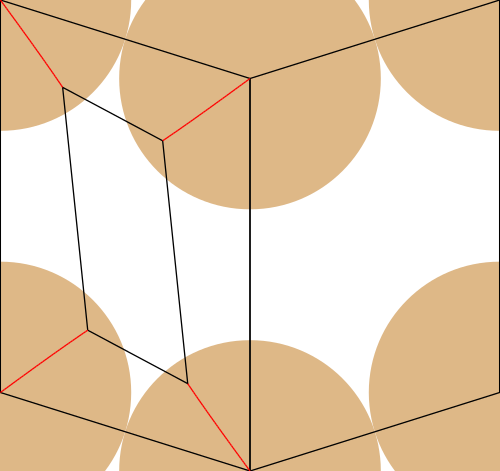

In [19]:
for i in range (20):
    lang_polys[0],creases = shrink_polygon(lang_polys[0],step,creases)
render(points,circles,creases,lang_polys)